In [42]:
import numpy as np
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Polygon, Wedge


In [2]:
def rot(a):
    return np.array([np.cos(a), np.sin(a)])

In [3]:
rot(2*np.pi/3)

array([-0.5      ,  0.8660254])

In [4]:
# матриця координат базисних коренів, по стовпчикам
a1 = rot(0)
a2 = rot(2*np.pi / 3)
A = np.c_[a1,a2]
A

array([[ 1.       , -0.5      ],
       [ 0.       ,  0.8660254]])

In [5]:
def mdot(x,y):
    return 2*np.dot(x,y) / np.dot(y,y)

In [6]:
# Матриця Картана
C = np.zeros((2,2), dtype=np.float64)
for i in range(2):
    for j in range(2):
        C[i,j] = mdot(A[:,i],A[:,j])
C

array([[ 2., -1.],
       [-1.,  2.]])

In [7]:
C1 = np.linalg.inv(C).T
C1

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])

In [8]:
W = A @ C1
W

array([[0.5       , 0.        ],
       [0.28867513, 0.57735027]])

In [9]:
for i in range(2):
    for j in range(2):
        print(f"<w_{i}, a_{j}> = ", mdot(W[:,i], A[:,j]))

<w_0, a_0> =  1.0
<w_0, a_1> =  5.551115123125784e-17
<w_1, a_0> =  0.0
<w_1, a_1> =  1.0000000000000002


In [67]:
def dual(a):
    return 2*a / np.dot(a,a)

def dualwith(x,a):
    return 2*x / np.dot(a,a)

In [58]:
w1, w2 = W.T
w3 = w2-w1

xi = a1+a2
lam = 2*w1 + w2

print(w1, w2, lam)

[0.5        0.28867513] [0.         0.57735027] [1.         1.15470054]


In [14]:
def refl(x, a):
    return x - mdot(x,a)*a

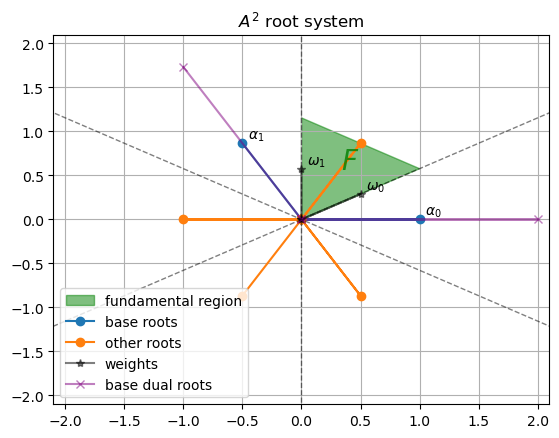

In [69]:
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.grid()

# fundamental region F
F_vertices = [np.zeros(2), 1*dualwith(w1,a1), 1*dualwith(w2,a2)]
plt.gca().add_patch(Polygon(F_vertices, closed=True, color='green', alpha=0.5, label='fundamental region'))
plt.text(*(np.mean(F_vertices, axis=0)), '$F$', {'fontsize': 20}, alpha=0.8, color='green')

line = []
for i,a in enumerate(A.T):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\alpha_{'+str(i)+'}$')
plt.plot(*(np.array(line).T), '-o', label='base roots')

line = []
rootsystem = [a1+a2, -a1, -a2, -a1-a2]
for a in rootsystem:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-o', label='other roots')

line = []
weights = W.T
for i,a in enumerate(weights):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\omega_{'+str(i)+'}$')
plt.plot(*(np.array(line).T), '-*', label='weights', c='black', alpha=0.5)

line = []
for a in A.T:
    line.append(np.zeros(2))
    line.append(dual(a))
plt.plot(*(np.array(line).T), '-x', label='base dual roots', c='purple', alpha=0.5)

line = [-10*w1, 10*w1]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
line = [-10*w2, 10*w2]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
line = [-10*w3, 10*w3]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)



plt.title("$A^2$ root system")
plt.legend()

In [66]:
def refl0(x):
    return refl(x,xi) + 2*xi / np.dot(xi,xi)

all(refl0(xi) - xi < 1e-7)

True

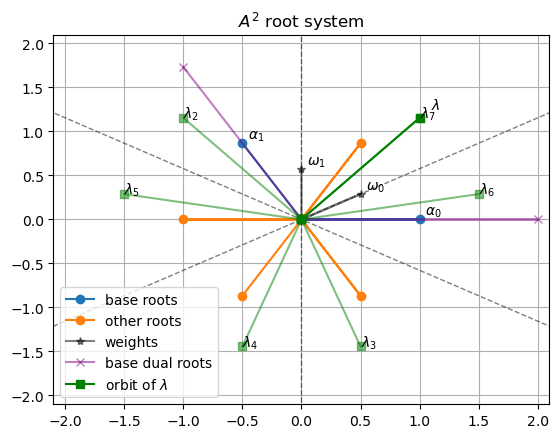

In [57]:
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.grid()

line = []
for i,a in enumerate(A.T):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\alpha_{'+str(i)+'}$')
plt.plot(*(np.array(line).T), '-o', label='base roots')

line = []
rootsystem = [a1+a2, -a1, -a2, -a1-a2]
for a in rootsystem:
    line.append(np.zeros(2))
    line.append(a)
plt.plot(*(np.array(line).T), '-o', label='other roots')

line = []
weights = W.T
for i,a in enumerate(weights):
    line.append(np.zeros(2))
    line.append(a)
    plt.text(*(a+0.05), '$\\omega_{'+str(i)+'}$')
plt.plot(*(np.array(line).T), '-*', label='weights', c='black', alpha=0.5)

line = []
for a in A.T:
    line.append(np.zeros(2))
    line.append(dual(a))
plt.plot(*(np.array(line).T), '-x', label='base dual roots', c='purple', alpha=0.5)

line = [-10*w1, 10*w1]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
line = [-10*w2, 10*w2]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)
line = [-10*w3, 10*w3]
plt.plot(*(np.array(line).T), '--', c='k', lw=1, alpha=0.5)


orb = [lam]
plt.plot([0, lam[0]], [0, lam[1]], '-s', label='orbit of $\lambda$', c='g')
plt.text(*(lam+0.1), '$\lambda$')
for i in range(3):
    lam1 = refl(orb[-1], a1)
    plt.plot([0, lam1[0]], [0, lam1[1]], '-s', label='', c='g', alpha=0.5)
    plt.text(*lam1, '$\lambda_{'+str(2*i+2)+'}$')
    lam2 = refl(lam1, a2)
    plt.plot([0, lam2[0]], [0, lam2[1]], '-s', label='', c='g', alpha=0.5)
    plt.text(*lam2, '$\lambda_{'+str(2*i+3)+'}$')
    orb += [lam1, lam2]



plt.title("$A^2$ root system")
plt.legend()

In [94]:
r1 = np.array([[-1, 0],[1,1]])
r2 = np.array([[1, 1],[0,-1]])

rs = [np.eye(2)]
rnames = ['']
for i in range(3):
    r = rs[-1]
    rname = rnames[-1]
    rs.append(r1 @ r)
    rnames.append('1'+rname)
    rs.append(r2 @ r1 @ r)
    rnames.append('21'+rname)

assert np.sum(np.abs(rs[-1] - np.eye(2))) < 1e-6
rs = rs[:-1]
rnames = rnames[:-1]
rnames[0] = 'id'

for a,b in zip(rs,rnames):
    print(b, '\n', a, '\n')

print('r2'+rnames[-1]+'=\n', r2 @ rs[-1])

id 
 [[1. 0.]
 [0. 1.]] 

1 
 [[-1.  0.]
 [ 1.  1.]] 

21 
 [[ 0.  1.]
 [-1. -1.]] 

121 
 [[ 0. -1.]
 [-1.  0.]] 

2121 
 [[-1. -1.]
 [ 1.  0.]] 

12121 
 [[ 1.  1.]
 [ 0. -1.]] 

r212121=
 [[1. 0.]
 [0. 1.]]


In [97]:
start = np.array([2, 1])
for r in rs:
    print(r @ start)
print(r2 @ rs[-1] @ start)

[2. 1.]
[-2.  3.]
[ 1. -3.]
[-1. -2.]
[-3.  2.]
[ 3. -1.]
[2. 1.]
